#### Load and examine the Online Retail Transactions Dataset

https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# df = pd.read_csv('raw_data/online_retail.csv')
# df.head(3)

In [5]:
# df.sample(n=10000, random_state=111).to_csv('raw_data/online_retail_10000_sampled.csv', index=False)

In [6]:
df = pd.read_csv('raw_data/online_retail_10000_sampled.csv')
df.shape

(10000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9981 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   10000 non-null  int64  
 7   Country      10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [8]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,10000,10000,9981,10000.000000,10000,10000.000000,10000.000000,10000
unique,6124,2424,2440,NaN,5960,NaN,NaN,32
top,538349,85099B,JUMBO BAG RED RETROSPOT,NaN,2010-12-10 14:59:00,NaN,NaN,United Kingdom
freq,17,43,43,NaN,17,NaN,NaN,9164
mean,NaN,NaN,NaN,9.513800,NaN,4.398290,15295.798300,NaN
std,NaN,NaN,NaN,35.012372,NaN,52.367496,1485.359019,NaN
min,NaN,NaN,NaN,-1200.000000,NaN,0.000000,12347.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14377.500000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15287.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16286.250000,NaN


In [9]:
df.query('Quantity < 0').shape

(189, 8)

In [10]:
df.query('UnitPrice == 0').shape

(29, 8)

In [11]:
sorted_value_counts = df['Country'].value_counts(normalize=True).sort_values(ascending=False)
country_list = sorted_value_counts[sorted_value_counts > 0.01].index.to_list()

In [12]:
significant_countries = []

df['country_simplified'] = df['Country'].apply(lambda x: x if x in country_list else 'Other')
df['country_simplified'].value_counts()

country_simplified
United Kingdom    9164
Other              375
Germany            170
France             150
EIRE               141
Name: count, dtype: int64

In [14]:
from feature_engine.encoding import RareLabelEncoder

encoder = RareLabelEncoder(tol=0.1, variables=['Country'])
df = encoder.fit_transform(df)
df

/home/rojo/dev/pa-demo/venv/lib/python3.12/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Country is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_simplified
0,567211,22629,SPACEBOY LUNCH BOX,2,2011-09-19 11:02:00,1.95,14159,United Kingdom,United Kingdom
1,547108,22720,SET OF 3 CAKE TINS PANTRY DESIGN,5,2011-03-21 11:36:00,4.95,14659,United Kingdom,United Kingdom
2,552232,23208,LUNCH BAG VINTAGE LEAF DESIGN,1,2011-05-06 15:54:00,4.13,15287,United Kingdom,United Kingdom
3,577551,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2011-11-20 15:21:00,0.55,12395,Rare,Other
4,566440,23354,6 GIFT TAGS 50'S CHRISTMAS,12,2011-09-12 15:19:00,0.83,15755,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...,...
9995,578824,23476,WOODLAND LARGE RED FELT HEART,5,2011-11-25 14:02:00,1.25,17883,United Kingdom,United Kingdom
9996,561891,22158,3 HEARTS HANGING DECORATION RUSTIC,2,2011-07-31 14:19:00,2.95,15438,United Kingdom,United Kingdom
9997,543518,20750,RED RETROSPOT MINI CASES,24,2011-02-09 11:21:00,6.35,12753,Rare,Other
9998,566286,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2011-09-11 14:58:00,0.55,14057,United Kingdom,United Kingdom


/tmp/ipykernel_555914/2390890973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country_simplified', data=df, palette='coolwarm', ax=axes[0], orient='x')


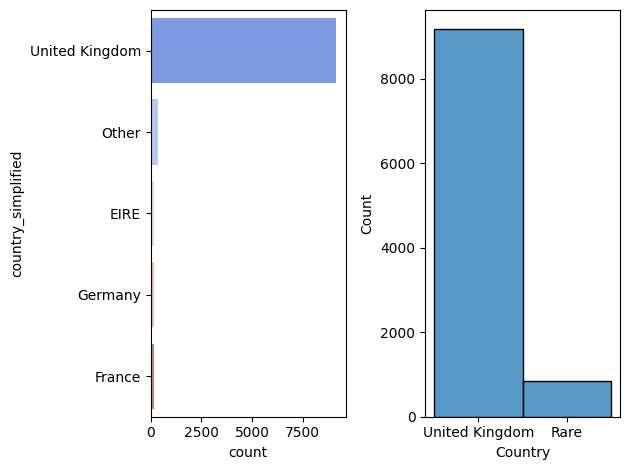

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# category_count = df['country_simplified'].value_counts(normalize=True)
# plt.pie(x=category_count, labels=category_count.index)
sns.countplot(y='country_simplified', data=df, palette='coolwarm', ax=axes[0], orient='x')
sns.histplot(data=df, x="Country", ax=axes[1])
plt.tight_layout()
plt.show()

In [47]:
df['datetime'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day_name()
day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_simplified,datetime,month,day,total_price
0,567211,22629,SPACEBOY LUNCH BOX,2,2011-09-19 11:02:00,1.95,14159,United Kingdom,United Kingdom,2011-09-19 11:02:00,September,Monday,3.90
1,547108,22720,SET OF 3 CAKE TINS PANTRY DESIGN,5,2011-03-21 11:36:00,4.95,14659,United Kingdom,United Kingdom,2011-03-21 11:36:00,March,Monday,24.75
2,552232,23208,LUNCH BAG VINTAGE LEAF DESIGN,1,2011-05-06 15:54:00,4.13,15287,United Kingdom,United Kingdom,2011-05-06 15:54:00,May,Friday,4.13
3,577551,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2011-11-20 15:21:00,0.55,12395,Rare,Other,2011-11-20 15:21:00,November,Sunday,13.20
4,566440,23354,6 GIFT TAGS 50'S CHRISTMAS,12,2011-09-12 15:19:00,0.83,15755,United Kingdom,United Kingdom,2011-09-12 15:19:00,September,Monday,9.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,578824,23476,WOODLAND LARGE RED FELT HEART,5,2011-11-25 14:02:00,1.25,17883,United Kingdom,United Kingdom,2011-11-25 14:02:00,November,Friday,6.25
9996,561891,22158,3 HEARTS HANGING DECORATION RUSTIC,2,2011-07-31 14:19:00,2.95,15438,United Kingdom,United Kingdom,2011-07-31 14:19:00,July,Sunday,5.90
9997,543518,20750,RED RETROSPOT MINI CASES,24,2011-02-09 11:21:00,6.35,12753,Rare,Other,2011-02-09 11:21:00,February,Wednesday,152.40
9998,566286,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2011-09-11 14:58:00,0.55,14057,United Kingdom,United Kingdom,2011-09-11 14:58:00,September,Sunday,13.20


In [38]:
df['total_price'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_simplified,datetime,month,day,total_price
0,567211,22629,SPACEBOY LUNCH BOX,2,2011-09-19 11:02:00,1.95,14159,United Kingdom,United Kingdom,2011-09-19 11:02:00,September,Monday,3.90
1,547108,22720,SET OF 3 CAKE TINS PANTRY DESIGN,5,2011-03-21 11:36:00,4.95,14659,United Kingdom,United Kingdom,2011-03-21 11:36:00,March,Monday,24.75
2,552232,23208,LUNCH BAG VINTAGE LEAF DESIGN,1,2011-05-06 15:54:00,4.13,15287,United Kingdom,United Kingdom,2011-05-06 15:54:00,May,Friday,4.13
3,577551,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2011-11-20 15:21:00,0.55,12395,Rare,Other,2011-11-20 15:21:00,November,Sunday,13.20
4,566440,23354,6 GIFT TAGS 50'S CHRISTMAS,12,2011-09-12 15:19:00,0.83,15755,United Kingdom,United Kingdom,2011-09-12 15:19:00,September,Monday,9.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,578824,23476,WOODLAND LARGE RED FELT HEART,5,2011-11-25 14:02:00,1.25,17883,United Kingdom,United Kingdom,2011-11-25 14:02:00,November,Friday,6.25
9996,561891,22158,3 HEARTS HANGING DECORATION RUSTIC,2,2011-07-31 14:19:00,2.95,15438,United Kingdom,United Kingdom,2011-07-31 14:19:00,July,Sunday,5.90
9997,543518,20750,RED RETROSPOT MINI CASES,24,2011-02-09 11:21:00,6.35,12753,Rare,Other,2011-02-09 11:21:00,February,Wednesday,152.40
9998,566286,23309,SET OF 60 I LOVE LONDON CAKE CASES,24,2011-09-11 14:58:00,0.55,14057,United Kingdom,United Kingdom,2011-09-11 14:58:00,September,Sunday,13.20


In [49]:
daily_sales = df.groupby(by=['day'])['total_price'].agg(['sum'])
daily_sales

/tmp/ipykernel_555914/3569233443.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = df.groupby(by=['day'])['total_price'].agg(['sum'])


,sum
day,
Monday,25336.69
Tuesday,44090.54
Wednesday,31701.29
Thursday,42016.24
Friday,26333.47
Saturday,0.00
Sunday,17285.77


/tmp/ipykernel_555914/348359981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='sum', data=daily_sales, palette='coolwarm')


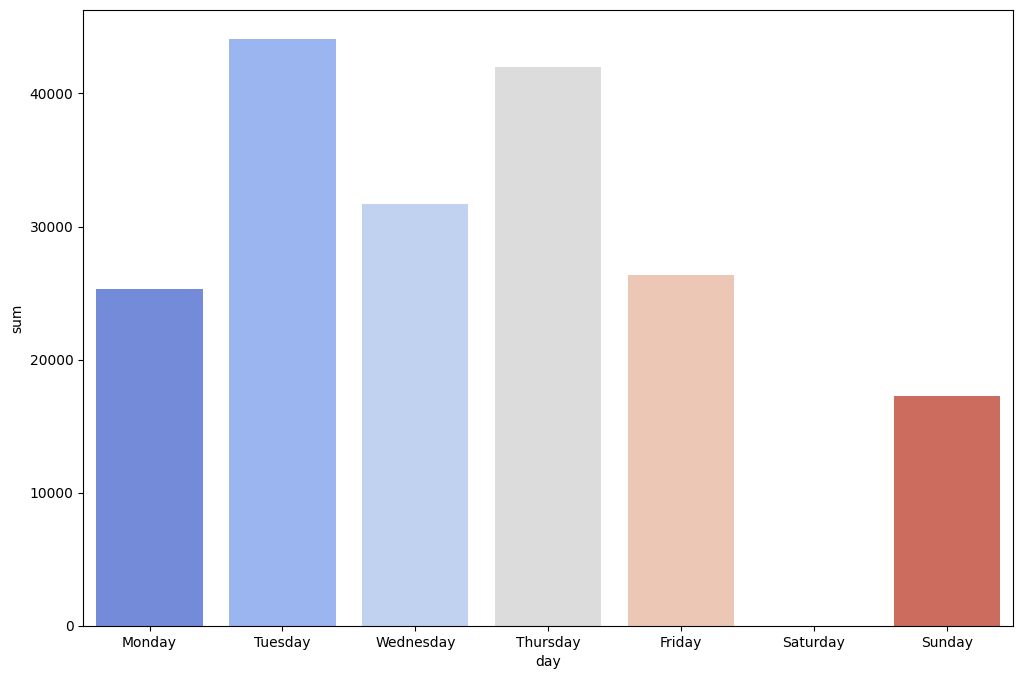

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x='day', y='sum', data=daily_sales, palette='coolwarm')
plt.show()